#### Importing required Libraries

In [32]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing NumPy for numerical computations
import numpy as np

# Importing matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing seaborn for enhanced data visualization
import seaborn as sns

# Importing MinMaxScaler for normalizing the data
from sklearn.preprocessing import MinMaxScaler

# Importing necessary modules from Keras to build a neural network
from tensorflow.keras.models import Sequential  # To initialize the neural network
from tensorflow.keras.layers import LSTM, Dense, Dropout  # To add LSTM, Dense, and Dropout layers

# Suppressing all warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


#### Loading dataset

In [33]:
# Defining the file path for the training dataset
train_path = 'dataset/train.csv'

# Defining the file path for the testing dataset
test_path = 'dataset/test.csv'

# Reading the training dataset into a pandas DataFrame
train_data = pd.read_csv(train_path)

# Reading the testing dataset into a pandas DataFrame
test_data = pd.read_csv(test_path)


#### Head of dataset

In [34]:
# Displaying the first 5 rows of the training dataset to understand its structure
print(train_data.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [35]:
# Displaying the first 5 rows of the testing dataset to understand its structure
print(test_data.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748         -0.994403         -0.970735   
3         -0.973268         -0.967091         -0.995274         -0.974471   
4         -0.967445         -0.978295         -0.994111         -0.965953   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

#### EDA of data

In [36]:
# Printing the number of rows and columns in the training dataset
print("Train shape:", train_data.shape)

# Printing the number of rows and columns in the testing dataset
print("Test shape:", test_data.shape)


Train shape: (7352, 563)
Test shape: (2947, 563)


In [37]:
# Displaying summary information about the training dataset, including column names, non-null counts, and data types
print(train_data.info())

# Displaying summary information about the testing dataset, including column names, non-null counts, and data types
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB
None


In [38]:
# Displaying descriptive statistics for the numerical columns in the training dataset
print(train_data.describe())

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   


In [39]:
# Displaying descriptive statistics for the numerical columns in the testing dataset
print(test_data.describe())

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        2947.000000        2947.000000        2947.000000   
mean            0.273996          -0.017863          -0.108386   
std             0.060570           0.025745           0.042747   
min            -0.592004          -0.362884          -0.576184   
25%             0.262075          -0.024961          -0.121162   
50%             0.277113          -0.016967          -0.108458   
75%             0.288097          -0.010143          -0.097123   
max             0.671887           0.246106           0.494114   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       2947.000000       2947.000000       2947.000000       2947.000000   
mean          -0.613635         -0.508330         -0.633797         -0.641278   
std            0.412597          0.494269          0.362699          0.385199   
min           -0.999606         -1.000000         -0.998955         -0.999417   


#### Checking for missing values

In [40]:
# Checking for missing values in the training dataset,
# sorting them in descending order, and displaying the top 10 columns with the most missing values
print(train_data.isnull().sum().sort_values(ascending=False).head(10))

# Checking for missing values in the testing dataset,
# sorting them in descending order, and displaying the top 10 columns with the most missing values
print(test_data.isnull().sum().sort_values(ascending=False).head(10))


tBodyAcc-mean()-X            0
fBodyAccJerk-kurtosis()-Y    0
fBodyAccJerk-meanFreq()-X    0
fBodyAccJerk-meanFreq()-Y    0
fBodyAccJerk-meanFreq()-Z    0
fBodyAccJerk-skewness()-X    0
fBodyAccJerk-kurtosis()-X    0
fBodyAccJerk-skewness()-Y    0
fBodyAccJerk-skewness()-Z    0
fBodyAccJerk-maxInds-Y       0
dtype: int64
tBodyAcc-mean()-X            0
fBodyAccJerk-kurtosis()-Y    0
fBodyAccJerk-meanFreq()-X    0
fBodyAccJerk-meanFreq()-Y    0
fBodyAccJerk-meanFreq()-Z    0
fBodyAccJerk-skewness()-X    0
fBodyAccJerk-kurtosis()-X    0
fBodyAccJerk-skewness()-Y    0
fBodyAccJerk-skewness()-Z    0
fBodyAccJerk-maxInds-Y       0
dtype: int64


##### Checking for target variable distribution

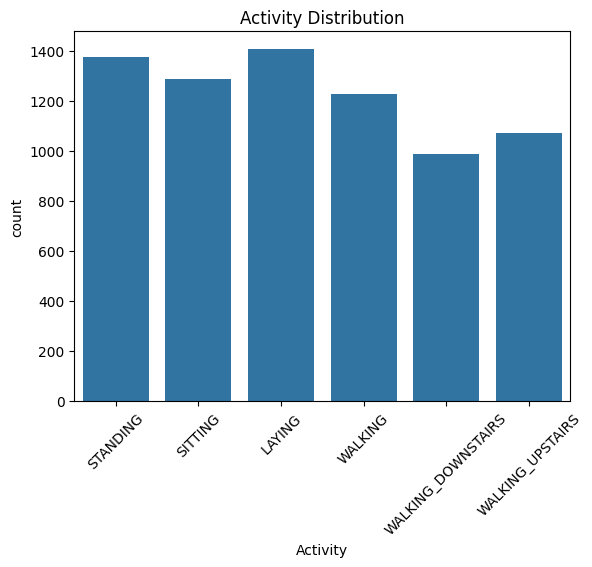

In [41]:
# Creating a count plot to visualize the distribution of the 'Activity' column in the training dataset
sns.countplot(data=train_data, x='Activity')

# Rotating the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Setting the title of the plot
plt.title("Activity Distribution")

# Displaying the plot
plt.show()


##### Checking for Class Balance

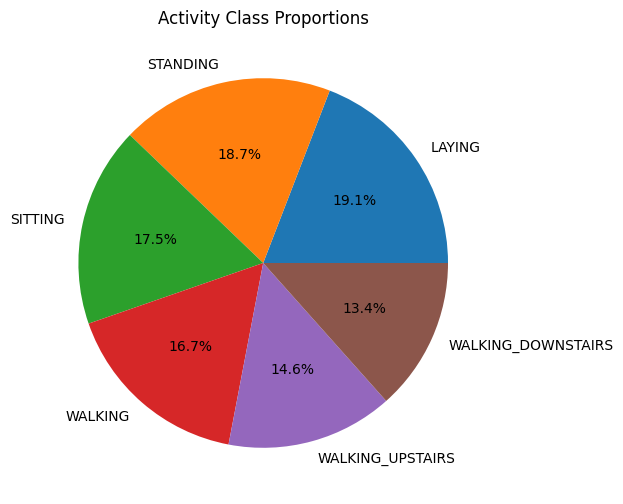

In [42]:
# Counting the occurrences of each unique value in the 'Activity' column of the training dataset
activity_counts = train_data['Activity'].value_counts()

# Creating a pie chart to visualize the proportion of each activity class
activity_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))

# Setting the title for the pie chart
plt.title("Activity Class Proportions")

# Removing the default y-axis label for cleaner visualization
plt.ylabel('')

# Displaying the pie chart
plt.show()


##### Separating features and target

In [43]:
# Creating the training feature set by dropping the 'Activity' target column from the training data
X_train = train_data.drop('Activity', axis=1)

# Extracting the target labels for training from the 'Activity' column
y_train = train_data['Activity']

# Creating the testing feature set by dropping the 'Activity' target column from the test data
X_test = test_data.drop('Activity', axis=1)

# Extracting the target labels for testing from the 'Activity' column
y_test = test_data['Activity']


In [29]:
# Importing LabelEncoder to convert categorical labels into numeric form
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder instance
label_encoder = LabelEncoder()

# Fitting the encoder on the training labels and transforming them into numeric labels
y_train = label_encoder.fit_transform(y_train)

# Transforming the test labels into numeric labels using the already fitted encoder
y_test = label_encoder.transform(y_test)

# Printing the first 5 encoded training labels to check the transformation
print("Encoded y_train:", y_train[:5])

# Creating a dictionary mapping original labels to their encoded numeric values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Printing the label encoding mapping for reference
print("Label Encoding Mapping:\n", label_mapping)


Encoded y_train: [2 2 2 2 2]
Label Encoding Mapping:
 {'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


##### Normalize the features using MinMaxScaler

In [30]:
# Initializing a MinMaxScaler to scale features to a range between 0 and 1
scaler = MinMaxScaler()

# Fitting the scaler to the training features and transforming them to the scaled range
X_train = scaler.fit_transform(X_train)

# Transforming the test features using the previously fitted scaler (to maintain consistency)
X_test = scaler.transform(X_test)


##### Reshaping the input data for LSTM

In [15]:
# Reshaping training features to 3D shape (samples, time steps, features) for LSTM input
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Reshaping test features similarly to match LSTM input requirements
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Printing the shape of reshaped training data to verify the new dimensions
print("X_train_reshaped shape:", X_train_reshaped.shape)

# Printing the shape of reshaped test data to verify the new dimensions
print("X_test_reshaped shape:", X_test_reshaped.shape)


X_train_reshaped shape: (7352, 1, 562)
X_test_reshaped shape: (2947, 1, 562)


####  LSTM model

In [16]:
# Initializing a sequential neural network model
model = Sequential()

# Adding an LSTM layer with 64 units, specifying input shape as (time steps, features)
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Adding a Dropout layer to reduce overfitting by randomly disabling 50% of the neurons during training
model.add(Dropout(0.5))

# Adding a Dense output layer with 6 units (number of classes) and softmax activation for multi-class classification
model.add(Dense(6, activation='softmax'))

# Compiling the model with Adam optimizer, sparse categorical cross-entropy loss for integer labels, and accuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Printing a summary of the model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │       160,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,902 (628.52 KB)

 Trainable params: 160,902 (628.52 KB)

 Non-trainable params: 0 (0.00 B)

#### Trainig model

In [17]:
# Training the LSTM model on the training data for 100 epochs with a batch size of 64,
# while validating performance on the test data during training
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Evaluating the trained model on the test dataset to get loss and accuracy metrics
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)

# Printing the test loss with 4 decimal places
print(f"Test Loss: {test_loss:.4f}")

# Printing the test accuracy with 4 decimal places
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5327 - loss: 1.1602 - val_accuracy: 0.8823 - val_loss: 0.4335
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8613 - loss: 0.3942 - val_accuracy: 0.9094 - val_loss: 0.2860
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9069 - loss: 0.2720 - val_accuracy: 0.9250 - val_loss: 0.2239
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9307 - loss: 0.2110 - val_accuracy: 0.9033 - val_loss: 0.2297
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9389 - loss: 0.1798 - val_accuracy: 0.9325 - val_loss: 0.1908
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9454 - loss: 0.1533 - val_accuracy: 0.9488 - val_loss: 0.1523
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9514 - loss: 0.1378 - val_accuracy: 0.9433 - val_loss: 0.1588
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9558 - loss: 0.1290 - val_accu

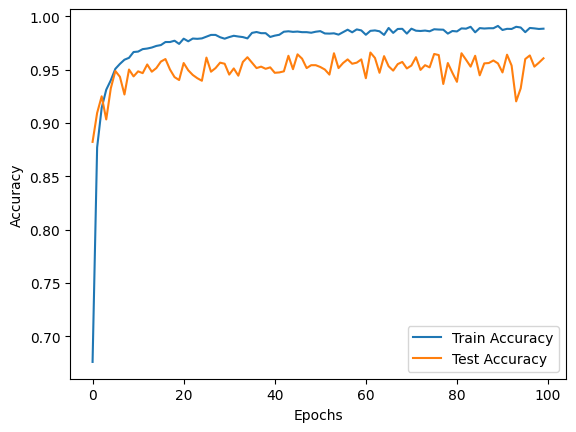

In [18]:
# Plotting the training accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')

# Plotting the validation (test) accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Test Accuracy')

# Labeling the x-axis as 'Epochs'
plt.xlabel('Epochs')

# Labeling the y-axis as 'Accuracy'
plt.ylabel('Accuracy')

# Adding a legend to distinguish between training and test accuracy lines
plt.legend()

# Displaying the plot
plt.show()


#### Random Forest

In [19]:
# Importing RandomForestClassifier for classification and evaluation metrics from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Initializing the Random Forest classifier with 100 trees and a fixed random seed for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Predicting the target labels for the test data
y_pred = rf_model.predict(X_test)

# Calculating the accuracy of the model predictions on the test data
accuracy = accuracy_score(y_test, y_pred)

# Printing the validation accuracy with 4 decimal places
print(f"Validation Accuracy: {accuracy:.4f}")

# Printing the detailed classification report including precision, recall, and f1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Validation Accuracy: 0.9247

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.91      0.89      0.90       491
           2       0.90      0.92      0.91       532
           3       0.90      0.96      0.93       496
           4       0.95      0.84      0.89       420
           5       0.89      0.92      0.90       471

    accuracy                           0.92      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.92      0.92      2947



#### SVM

In [20]:
# Importing SVC (Support Vector Classifier) and evaluation metrics from sklearn
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importing seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Initializing the SVM classifier with RBF kernel, regularization parameter C=1,
# gamma set to 'scale', and a fixed random state for reproducibility
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Training the SVM model on the training data
svm_model.fit(X_train, y_train)

# Predicting the target labels for the test data using the trained SVM model
y_pred = svm_model.predict(X_test)

# Calculating the accuracy of the SVM model predictions on the test data
accuracy = accuracy_score(y_test, y_pred)

# Printing the validation accuracy with 4 decimal places
print(f"Validation Accuracy: {accuracy:.4f}")

# Printing the detailed classification report including precision, recall, and f1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Validation Accuracy: 0.9511

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.94      0.89      0.91       491
           2       0.90      0.95      0.93       532
           3       0.94      0.99      0.96       496
           4       0.99      0.92      0.95       420
           5       0.94      0.96      0.95       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

